# Overfitting Solution for the Model

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
#  Load the dataset.
dataset = pd.read_csv("churn_modeling.csv")
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [16]:
dataset.isnull().sum()
#  we dont have any kind of the null valueinto the dataset.

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
input_data = dataset.iloc[:, :-1]
output_score = dataset.iloc[:, -1]

In [18]:
# print(input_data.head())
print(output_score.head())

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [19]:
# Split the data into the train test split.
x_train, x_test, y_train, y_test = train_test_split(input_data,output_score, test_size=0.2 , random_state=2)

In [20]:
print(input_data.shape, x_train.shape, x_test.shape)

(10000, 8) (8000, 8) (2000, 8)


In [21]:
#  Scaling the dataset.
st = StandardScaler()

In [22]:
st.fit(x_train)

StandardScaler()

In [23]:
x_train = pd.DataFrame(st.transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(st.transform(x_test), columns= x_test.columns)

In [24]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.277546,-1.232643,-0.012743,-1.239615,0.811186,0.649203,0.965108,-0.620271
1,-0.499595,0.284106,0.332830,1.306219,-0.902437,0.649203,0.965108,0.546598
2,0.678277,-0.095081,-1.395034,-1.239615,0.811186,0.649203,0.965108,-0.013208
3,-0.509927,-1.801425,1.369548,0.728185,0.811186,0.649203,-1.036153,-0.236775
4,-0.675242,1.421668,1.023976,0.160226,-0.902437,0.649203,0.965108,-0.783044
...,...,...,...,...,...,...,...,...
7995,-1.615474,-0.095081,0.678403,-1.239615,0.811186,0.649203,0.965108,-1.636736
7996,-0.602917,-1.232643,-0.358316,0.449125,0.811186,0.649203,-1.036153,0.562495
7997,2.062794,-0.284675,-0.703889,-1.239615,0.811186,0.649203,-1.036153,1.643567
7998,-1.026538,1.421668,-0.012743,0.415569,-0.902437,0.649203,-1.036153,1.324744


In [25]:
#  Import the modules for the deep learning.
import tensorflow
from keras.layers import BatchNormalization,Dense
from keras.regularizers import L2
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [26]:
ann = Sequential()

In [27]:
ann.add(Dense(6, input_dim = 8, activation="relu", kernel_regularizer=L2(l2=0.01)))
ann.add(BatchNormalization())
ann.add(Dense(4, activation="relu"))
ann.add(BatchNormalization())
ann.add(Dense(2, activation="relu"))
ann.add(BatchNormalization())
ann.add(Dense(1, activation="sigmoid"))

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
ann.compile(optimizer='adam', loss = "binary_crossentropy", metrics = ["accuracy"])

In [39]:
ann.fit(x_train, y_train, batch_size=100,epochs = 4, validation_data=(x_test, y_test), callbacks=EarlyStopping())

Epoch 1/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8151 - loss: 0.4393 - val_accuracy: 0.8280 - val_loss: 0.4135
Epoch 2/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8338 - loss: 0.4089 - val_accuracy: 0.8400 - val_loss: 0.4058
Epoch 3/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8254 - loss: 0.4110 - val_accuracy: 0.8485 - val_loss: 0.3978
Epoch 4/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8353 - loss: 0.4053 - val_accuracy: 0.8545 - val_loss: 0.3902


In [40]:
ann.history.history

{'accuracy': [0.8241249918937683,
  0.8301249742507935,
  0.8364999890327454,
  0.843625009059906],
 'loss': [0.4237505793571472,
  0.41281288862228394,
  0.40489256381988525,
  0.3971332907676697],
 'val_accuracy': [0.828000009059906,
  0.8399999737739563,
  0.8485000133514404,
  0.8544999957084656],
 'val_loss': [0.4135206341743469,
  0.4058144688606262,
  0.3978028893470764,
  0.39016208052635193]}

In [41]:
train_accuracy = ann.history.history["accuracy"]
test_accuracy = ann.history.history["val_accuracy"]

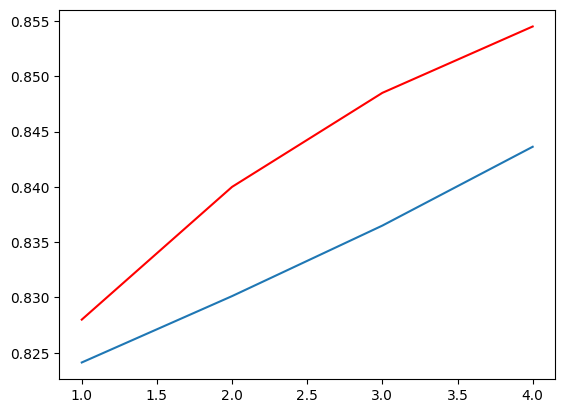

In [43]:
plt.plot([i for i in range(1,5)], train_accuracy)
plt.plot([i for i in range(1,5)], test_accuracy, c = 'red')
plt.show()

# print(train_accuracy)
# print(test_accuracy)

In [44]:
# Check the training accuracy for the model 
training_data_pred = ann.predict(x_train)
#  thw data we have in the 0 to 1 format due to the sigmoid logisticc function.

training_data_pred_data = []
for i in training_data_pred:
    if i[0] > 0.5:
        training_data_pred_data.append(1)
    else:
        training_data_pred_data.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [45]:
# Check the testing accuracy for the model 
testing_data_pred = ann.predict(x_test)
#  thw data we have in the 0 to 1 format due to the sigmoid logisticc function.

testing_data_pred_data = []
for i in testing_data_pred:
    if i[0] > 0.5:
        testing_data_pred_data.append(1)
    else:
        testing_data_pred_data.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [46]:
print(accuracy_score(testing_data_pred_data, y_test) * 100)

85.45


In [47]:
print(accuracy_score(training_data_pred_data, y_train) * 100)

84.6375


In [48]:
#  Check the model performance for the new data.
new_data = np.asarray((-0.577496	,-0.655786,	-0.695393,	0.329937	,0.808436	,-1.540351	,-1.025834	,-1.019605)).reshape(1,-1)

new_data_pred = ann.predict(new_data)
#  thw data we have in the 0 to 1 format due to the sigmoid logisticc function.

new_data = []
for i in new_data_pred:
    if i[0] > 0.5:
        new_data.append(1)
    else:
        new_data.append(0)

print(new_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
[0]
